In [558]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt


In [559]:
df = pd.DataFrame

In [560]:
#importar dados
dataset = pd.read_csv("limpezadados.csv", sep=",")
#visualizar
dataset.head()

,id,genero,nome,idade,salario,cidade,email,status,valor_compra,data_cadastro
0,1,F,Ana Souza,28,3200.50,Recife,ana.souza@email.com,ativo,150.75,2023-01-15
1,2,M,Bruno Lima,34,4100.00,São Paulo,bruno.lima@email.com,inativo,0.00,2022-11-08
2,3,F,Camila Alves,26,2750.80,Belo Horizonte,camila.alves@email.com,ativo,230.00,2023-06-22
3,4,M,Diego Martins,39,5300.25,Curitiba,diego.martins@email.com,ativo,1250.90,2023-03-10
4,5,F,Eliane Costa,31,2980.00,Salvador,eliane.costa@email.com,inativo,0.00,2022-12-01


In [561]:
#tamanho 
dataset.shape

(5, 10)

In [562]:
#explorar dados categorias 
#estado
agrupado = dataset.groupby(['cidade']).size()
agrupado

cidade
Belo Horizonte    1
Curitiba          1
Recife            1
Salvador          1
São Paulo         1
dtype: int64

<Axes: xlabel='cidade'>

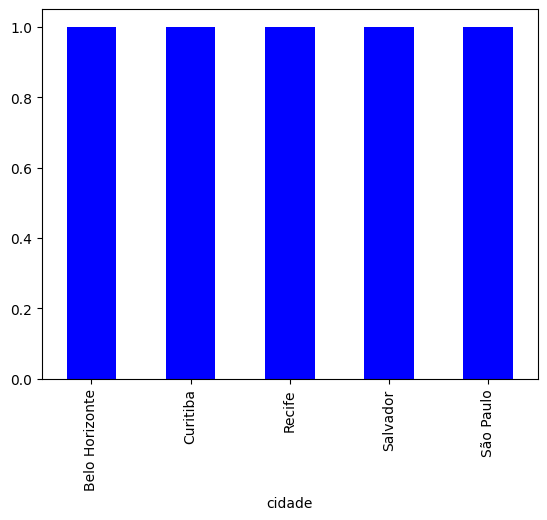

In [563]:
agrupado.plot.bar(color = 'blue')

In [564]:
#genero 
agrupado = dataset.groupby(['status']).size()
agrupado

status
ativo      3
inativo    2
dtype: int64

<Axes: xlabel='status'>

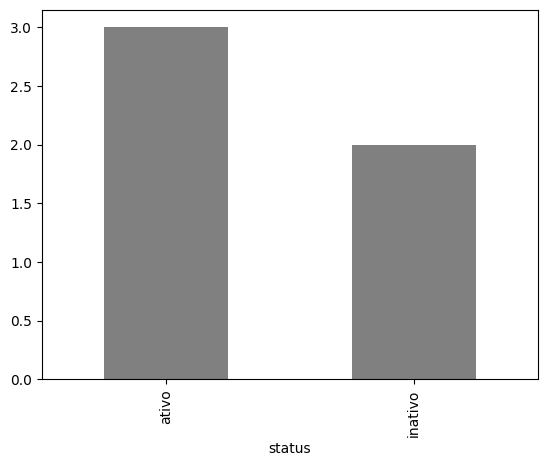

In [565]:
agrupado.plot.bar(color='gray')

In [566]:
#explorar colunas numéricos
#score
dataset['valor_compra'].describe()

count       5.000000
mean      326.330000
std       526.288901
min         0.000000
25%         0.000000
50%       150.750000
75%       230.000000
max      1250.900000
Name: valor_compra, dtype: float64

Text(0.5, 1.0, 'Contagem por Cidade')

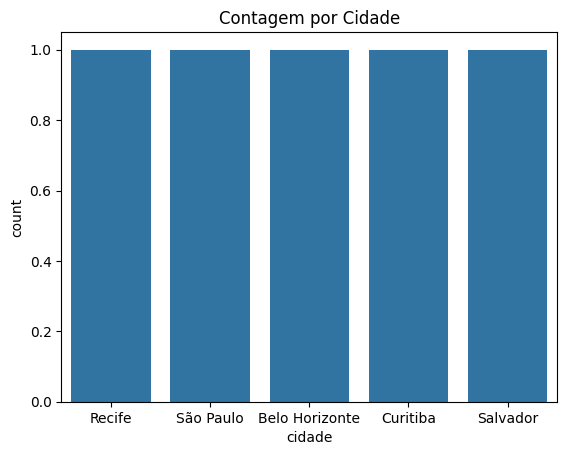

In [567]:
srn.countplot(x='cidade', data=dataset).set_title('Contagem por Cidade')

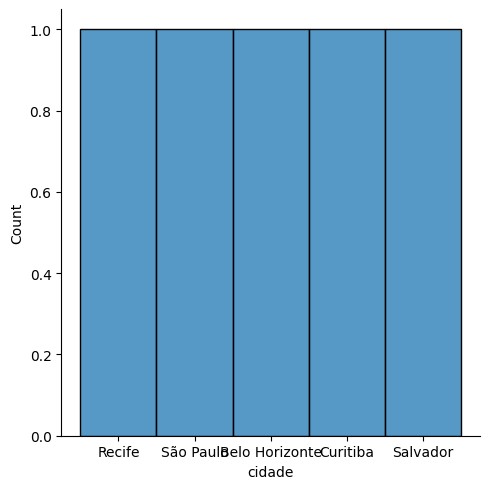

In [568]:
srn.displot(dataset['cidade']).set_titles('cidade')

In [569]:
#idade
dataset['idade'].describe()

count     5.000000
mean     31.600000
std       5.128353
min      26.000000
25%      28.000000
50%      31.000000
75%      34.000000
max      39.000000
Name: idade, dtype: float64

Text(0.5, 1.0, 'idade')

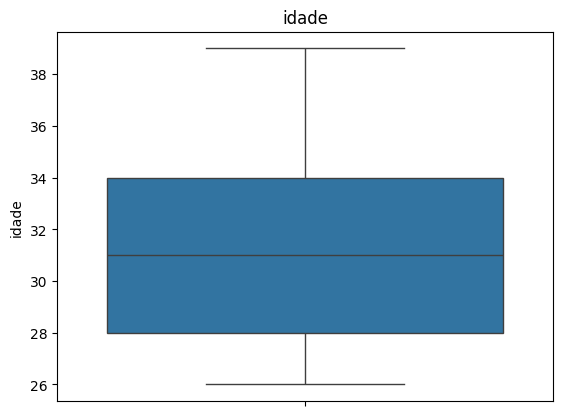

In [570]:
srn.boxplot(dataset['idade']).set_title('idade')

/tmp/ipykernel_9417/3242550569.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['idade']).set_title('idade')


Text(0.5, 1.0, 'idade')

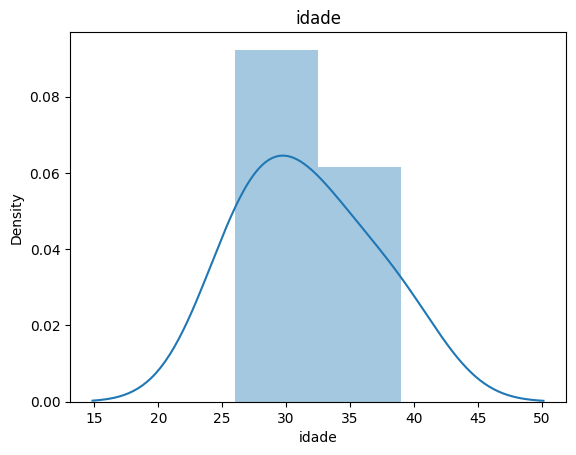

In [571]:
srn.distplot(dataset['idade']).set_title('idade')

In [572]:
#saldo 
dataset['valor_compra'].describe()

count       5.000000
mean      326.330000
std       526.288901
min         0.000000
25%         0.000000
50%       150.750000
75%       230.000000
max      1250.900000
Name: valor_compra, dtype: float64

Text(0.5, 1.0, 'valor_compra')

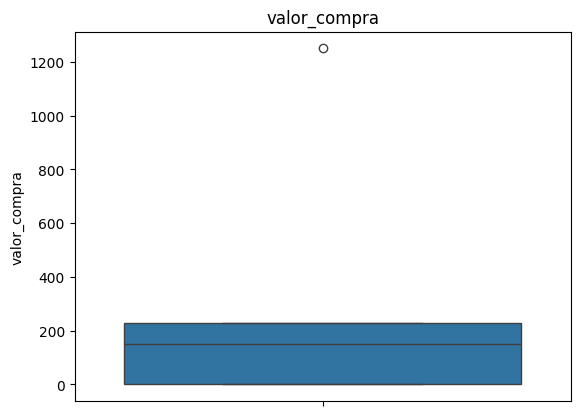

In [573]:
srn.boxplot(dataset['valor_compra']).set_title('valor_compra')

/tmp/ipykernel_9417/1329839559.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['valor_compra']).set_title('valor_compra')


Text(0.5, 1.0, 'valor_compra')

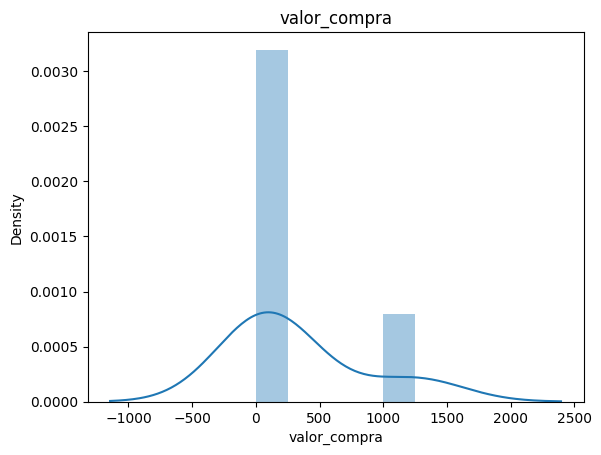

In [574]:
srn.distplot(dataset['valor_compra']).set_title('valor_compra')

In [575]:
#contamos valores NAN
#genero e salário
dataset['status'].describe()

count         5
unique        2
top       ativo
freq          3
Name: status, dtype: object

In [576]:
mediana = sts.median(dataset['valor_compra'])
mediana

150.75

In [577]:
#substituir NAN por mediana
dataset['valor_compra'].fillna(mediana, inplace=True)

/tmp/ipykernel_9417/2535512961.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['valor_compra'].fillna(mediana, inplace=True)


In [578]:
# verificamos se NAN não existe mais 
dataset['valor_compra'].isnull().sum()

np.int64(0)

In [579]:
#generos
agrupado = dataset.groupby(['genero']).size()
agrupado

genero
F    3
M    2
dtype: int64

In [580]:
#total de Nas 
dataset['genero'].isnull().sum()

np.int64(0)

In [581]:
#padronização de acordo com o dominio 
dataset.loc[dataset['genero'] == 'M', 'genero'] = 'Masculino'
dataset.loc[dataset['genero'].isin(['fem', 'F']), 'genero'] = 'Feminino'
#visualizar
agrupado = dataset.groupby(['genero']).size()
agrupado

genero
Feminino     3
Masculino    2
dtype: int64

In [582]:
#idades fora do dominio 
dataset['idade'].describe()

count     5.000000
mean     31.600000
std       5.128353
min      26.000000
25%      28.000000
50%      31.000000
75%      34.000000
max      39.000000
Name: idade, dtype: float64

In [583]:
#visualizar
dataset.loc[(dataset['idade'] < 20 ) | (dataset['idade'] > 56) ]

,id,genero,nome,idade,salario,cidade,email,status,valor_compra,data_cadastro


In [584]:
#calcular mediana 
mediana = sts.median(dataset['idade'])
mediana

31

In [585]:
#substituir
dataset.loc[(dataset['idade'] < 20) | (dataset['idade'] > 56), 'idade'] = mediana


In [586]:
#verificar se ainda existe idade fora do dominio 
dataset.loc[(dataset['idade'] < 0 ) | (dataset['idade'] > 120 ) ]

,id,genero,nome,idade,salario,cidade,email,status,valor_compra,data_cadastro


In [587]:
#dados duplicados, buscamos pelo id
dataset[dataset.duplicated(['id'], keep=False)]

,id,genero,nome,idade,salario,cidade,email,status,valor_compra,data_cadastro
